In [83]:
%pylab inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
figsize(15, 6)
pd.set_option('display.width', 4000)
pd.set_option('display.max_columns', 100)
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [84]:
orig_data = pd.read_csv('/Users/jinchung/sandbox/bigapple-data/311_Service_Requests_from_2010_to_Present.csv', nrows=100000, parse_dates=['Created Date'])

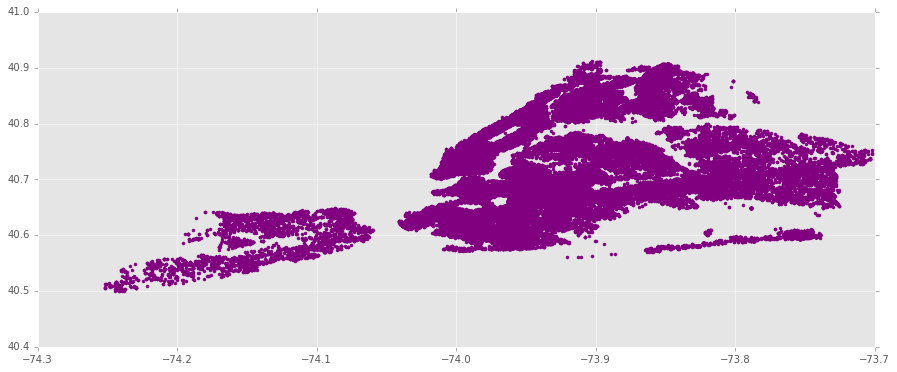

In [103]:
plot(orig_data['Longitude'], orig_data['Latitude'], '.', color="purple")

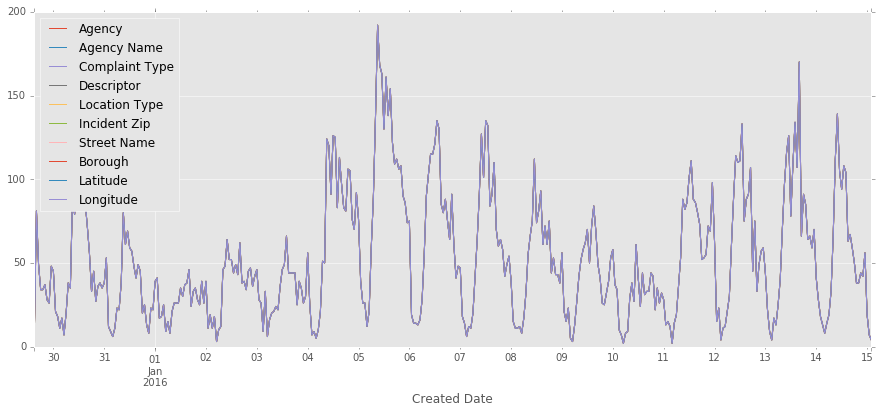

In [131]:
complaints = orig_data[['Created Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Street Name', 'Borough', 'Latitude', 'Longitude']]
types_of_complaints = complaints['Complaint Type']
manhattan_complaints = complaints[complaints['Borough'] == 'MANHATTAN']
noise_complaints = manhattan_complaints[manhattan_complaints['Complaint Type'] == 'Noise - Street/Sidewalk']
manhattan_complaints.set_index('Created Date').sort_index().resample('H', how=len).plot()

In [144]:
types_of_complaints.value_counts()[:60]
complaints['Complaint Type'].str.contains('Graffiti').value_counts()

False    99564
True       436
Name: Complaint Type, dtype: int64

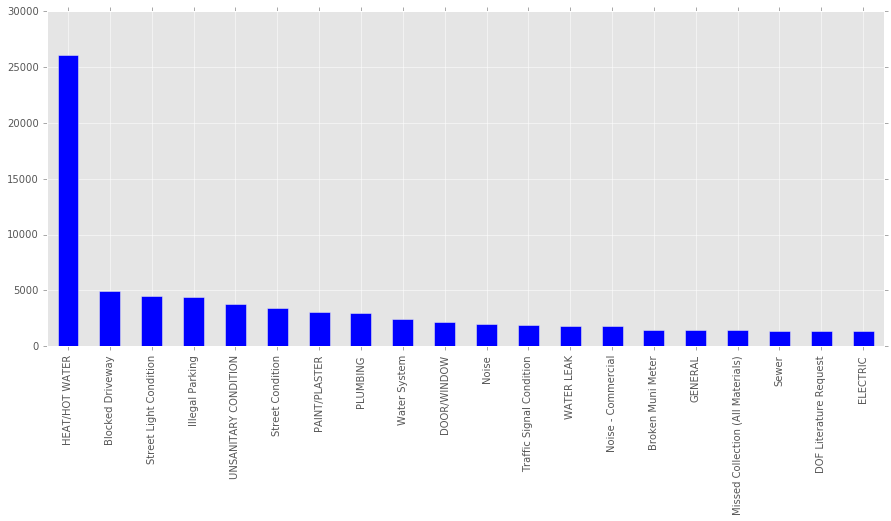

In [111]:
complaints['Complaint Type'].value_counts()[:20].plot(kind='bar')

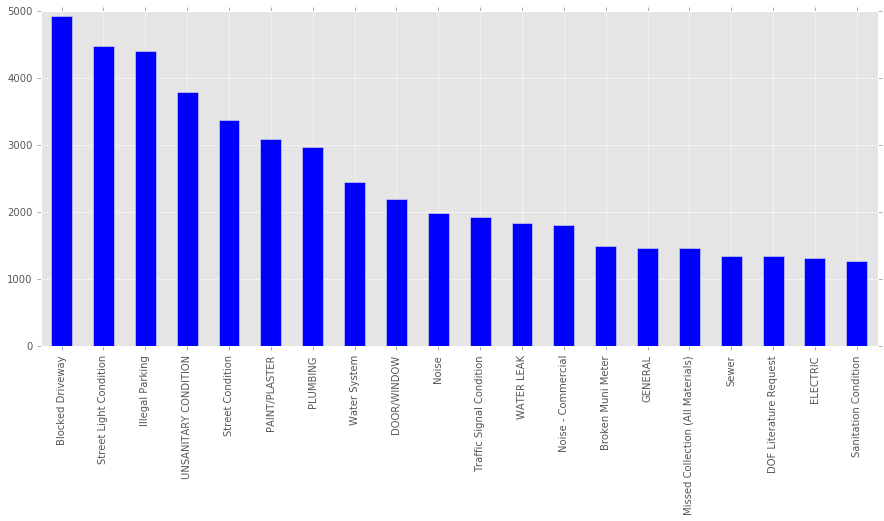

In [112]:
complaints_no_heat = complaints[complaints['Complaint Type'] != 'HEAT/HOT WATER']
complaints_no_heat['Complaint Type'].value_counts()[:20].plot(kind='bar')

In [92]:
manhattan_complaints['Complaint Type'].value_counts()[:20].plot(kind='bar')

In [7]:
jin_zipcode = manhattan_complaints[manhattan_complaints['Incident Zip'] == 10001]
paul_zipcode = manhattan_complaints[manhattan_complaints['Incident Zip'] == 10028]

In [93]:
jin_zipcode['Complaint Type'].value_counts()[:10].plot(kind='bar')

In [94]:
paul_zipcode['Complaint Type'].value_counts()[:20].plot(kind='bar')

In [95]:
(paul_zipcode['Complaint Type'] == 'Rodent').sum()

In [96]:
(jin_zipcode['Complaint Type'] == 'Rodent').sum()

In [18]:
loud_parties = manhattan_complaints[(manhattan_complaints['Complaint Type'] == 'Noise - Commercial') & (manhattan_complaints['Descriptor'] == 'Loud Music/Party')] 

In [97]:
rando = manhattan_complaints.copy()
plot(manhattan_complaints['Longitude'], manhattan_complaints['Latitude'], '.', color="purple")

In [98]:
plot(loud_parties['Longitude'], loud_parties['Latitude'], '.', color="purple")

In [71]:
manhattan_with_no_tree = manhattan_complaints[manhattan_complaints.index != 36508]

In [99]:
plot(manhattan_with_no_tree['Longitude'], manhattan_with_no_tree['Latitude'], '.', color="purple")

In [88]:
manhattan_complaints

In [79]:
graffiti_nyc = complaints[complaints['Complaint Type'] == 'Graffiti']

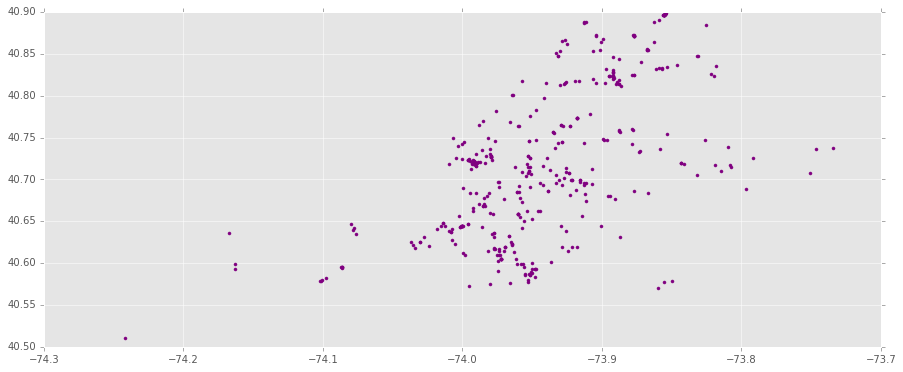

In [101]:
plot(graffiti_nyc['Longitude'], graffiti_nyc['Latitude'], '.', color="purple")

In [102]:
jin_zipcode

,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Street Name,Borough,Latitude,Longitude
16453,2016-01-12 17:07:37,DOT,Department of Transportation,Broken Muni Meter,Out of Order,Street,10001,9 AVENUE,MANHATTAN,40.750544,-73.998365
17056,2016-01-12 15:42:29,FDNY,Bureau of Fire Prevention - Highrise Unit - In...,Fire Safety Director - F58,On Site Test,Street Address,10001,7 AVENUE,MANHATTAN,40.748806,-73.992204
17132,2016-01-12 15:31:36,DOT,Department of Transportation,Broken Muni Meter,Out of Order,Street,10001,9 AVENUE,MANHATTAN,40.749018,-73.999488
17208,2016-01-12 15:18:37,FDNY,Bureau of Fire Prevention - Highrise Unit - In...,Fire Safety Director - F58,On Site Test,Street Address,10001,7 AVENUE,MANHATTAN,40.748806,-73.992204
17596,2016-01-12 14:33:00,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,10001,WEST 30 STREET,MANHATTAN,NaN,NaN
17970,2016-01-12 13:48:29,DOT,Department of Transportation,Broken Muni Meter,Out of Order,Street,10001,NaN,MANHATTAN,40.748400,-73.999939
18168,2016-01-12 13:27:15,DOT,Department of Transportation,Broken Muni Meter,Out of Order,Street,10001,9 AVENUE,MANHATTAN,40.750571,-73.998358
18217,2016-01-12 13:22:21,DOT,Department of Transportation,Broken Muni Meter,Out of Order,Street,10001,9 AVENUE,MANHATTAN,40.750698,-73.998257
18417,2016-01-12 13:00:33,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,Status Call,NaN,10001,WEST 28 STREET,MANHATTAN,40.749512,-73.998564
18448,2016-01-12 12:57:33,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,Status Call,NaN,10001,10 AVENUE,MANHATTAN,40.750966,-74.001772
